In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import mpld3
mpld3.enable_notebook()

from scipy.integrate import odeint
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

import warnings
warnings.filterwarnings('ignore')

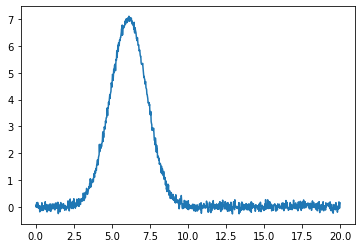

In [3]:
np.random.seed(42)
x = np.linspace(0, 20.0, 1001)

data = (gaussian(x, 21, 6.1, 1.2) + np.random.normal(scale=0.1, size=x.size))  # normal distr. with some noise
plt.plot(x, data);

In [13]:
dt = pd.read_csv('covid-statistics-by-us-states-daily-updates.csv').drop("Unnamed: 0", axis = 1)

In [16]:
dt

,date,state,positive,negative,pending,hospitalizedcurrently,hospitalizedcumulative,inicucurrently,inicucumulative,onventilatorcurrently,...,posneg,deathincrease,hospitalizedincrease,hash,commercialscore,negativeregularscore,negativescore,positivescore,score,grade
0,2020-07-29,AK,3442.0,220222.0,NaN,45.0,NaN,NaN,NaN,3.0,...,223664,0,0,e3c05df1cf92b9c80941cec8daaf723905e7a0dd,0,0,0,0,0,NaN
1,2020-07-29,AL,83782.0,584493.0,NaN,1598.0,9893.0,NaN,1109.0,NaN,...,668275,47,0,a7b049cfd14780e56e6ef98fb2aba9f82fe89838,0,0,0,0,0,NaN
2,2020-07-29,AR,40968.0,454637.0,NaN,508.0,2747.0,NaN,NaN,108.0,...,495605,6,61,e1fad45c3dbf16efc7ddd84400b3629a9c824a71,0,0,0,0,0,NaN
3,2020-07-29,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1037,0,0,62e46ea05669252eb426e2da4a1e822abcf86cb3,0,0,0,0,0,NaN
4,2020-07-29,AZ,168273.0,733156.0,NaN,2424.0,10060.0,800.0,NaN,561.0,...,901429,46,666,9c7e10ce8b2fb77e7a69df1d09c60accaab1a498,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,2020-01-26,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,7acb526e14f20a29cc74a0b32a37328bc6eac6c2,0,0,0,0,0,NaN
8189,2020-01-25,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,9b52ca94dd2a996822542ea5f17a7363e7ad91cf,0,0,0,0,0,NaN
8190,2020-01-24,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,094154f68e74bfc30b977cdee888f9c07be4360e,0,0,0,0,0,NaN
8191,2020-01-23,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,e16af2a6a8f060355ff5ba499a28309a262c0b1e,0,0,0,0,0,NaN


In [38]:
dt.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedcurrently', 'hospitalizedcumulative', 'inicucurrently',
       'inicucumulative', 'onventilatorcurrently', 'onventilatorcumulative',
       'recovered', 'dataqualitygrade', 'lastupdateet', 'datemodified',
       'checktimeet', 'death', 'hospitalized', 'datechecked',
       'totaltestsviral', 'positivetestsviral', 'negativetestsviral',
       'positivecasesviral', 'deathconfirmed', 'deathprobable', 'fips',
       'positiveincrease', 'negativeincrease', 'total', 'totaltestresults',
       'totaltestresultsincrease', 'posneg', 'deathincrease',
       'hospitalizedincrease', 'hash', 'commercialscore',
       'negativeregularscore', 'negativescore', 'positivescore', 'score',
       'grade'],
      dtype='object')

In [29]:
dt['inicucurrently'].value_counts().sort_index()

0.0        9
2.0       29
3.0        6
4.0       12
5.0       14
          ..
5071.0     1
5156.0     1
5198.0     1
5205.0     1
5225.0     1
Name: inicucurrently, Length: 866, dtype: int64

In [34]:
import plotly.express as px

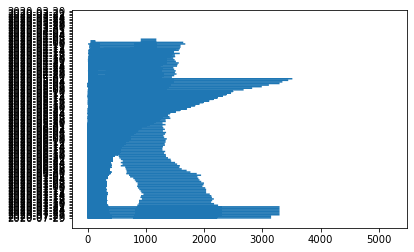

In [32]:
plt.plot(dt['inicucurrently'], dt['date'])
plt.show()

In [43]:
fig = px.line(dt, x="date", y='totaltestresults')
fig.show()

In [44]:
fig = px.line(dt, x="date", y='deathconfirmed')
fig.show()

In [45]:
fig = px.line(dt, x="date", y='deathincrease')
fig.show()

In [46]:
fig = px.line(dt, x="date", y='onventilatorcurrently')
fig.show()